# imports

In [14]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
import cv2
import keras 
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, ZeroPadding2D
from tensorflow.keras.models import Sequential, Model, load_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report
from tqdm import tqdm
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
# Path to the data directory
data_dir = 'Brain Tumor Data Set\Brain Tumor Data Set'
# Get the list of all the images
images = os.listdir(data_dir)
# Get the list of all the images
data = []
labels = []
for i in ['Healthy', 'Brain Tumor']:
    path = os.path.join(data_dir,i)
    for img in tqdm(os.listdir(path), desc=f'Processing {i} images'):
        try:
            image = cv2.imread(os.path.join(path,img))
            #print(os.path.join(path,img))
            image = cv2.resize(image, (224,224))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

Processing Brain Tumor images: 100%|██████████| 2513/2513 [00:12<00:00, 202.03it/s]


In [3]:
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
# Shuffle the data
data,labels = shuffle(data,labels, random_state=42)
# Split the data into train and test set
train_data,test_data,train_labels,test_labels = train_test_split(data,labels,test_size=0.1,random_state=42)
# Normalize the data
train_data = train_data / 255.0
test_data = test_data / 255.0
# Onehot encoding the labels
train_labels = pd.get_dummies(train_labels).values
test_labels = pd.get_dummies(test_labels).values
# Data Augmentation
train_datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, fill_mode="nearest")
train_datagen.fit(train_data)

# CNN model 

In [6]:
# Model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
history = model.fit(train_datagen.flow(train_data, train_labels, batch_size=32), epochs=10, validation_data=(test_data, test_labels))
# Save the model
model.save('model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


This code defines a convolutional neural network (CNN) model using the Keras API with TensorFlow backend. The model consists of several layers:

1. `Conv2D` layer with 32 filters, a kernel size of (3,3), and ReLU activation function. This layer takes an input shape of (224,224,3).
2. `MaxPooling2D` layer with a pool size of (2,2).
3. `Conv2D` layer with 64 filters, a kernel size of (3,3), and ReLU activation function.
4. `MaxPooling2D` layer with a pool size of (2,2).
5. `Conv2D` layer with 128 filters, a kernel size of (3,3), and ReLU activation function.
6. `MaxPooling2D` layer with a pool size of (2,2).
7. `Conv2D` layer with 256 filters, a kernel size of (3,3), and ReLU activation function.
8. `MaxPooling2D` layer with a pool size of (2,2).
9. `Flatten` layer to flatten the output of the previous layer into a 1D array.
10. `Dense` layer with 512 units and ReLU activation function.
11. `Dense` layer with 2 units and softmax activation function.

The `summary()` method is called on the model to display a summary of the model architecture, including the number of parameters in each layer.



# Plotting the model

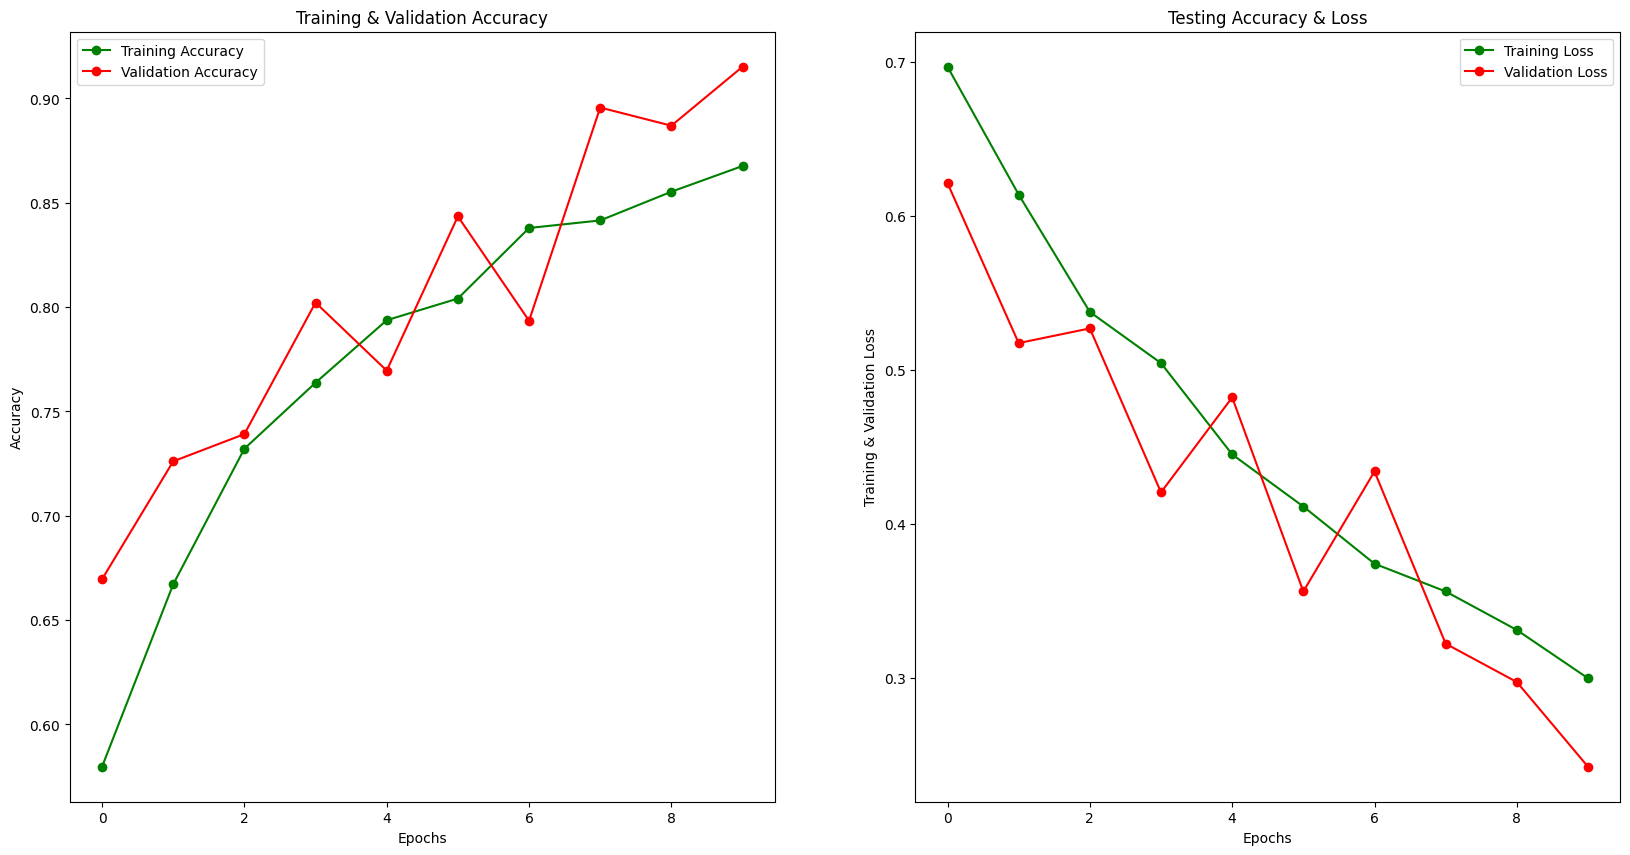

Average validation accuracy: 80.41%
Highest validation accuracy: 91.52% at epoch 9


In [11]:
# Plot the training and validation accuracy and loss at each epoch
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)
ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.savefig('plot.png', dpi=300)
plt.show()

# Calculate average accuracy as percentage
avg_acc = sum(val_acc) / len(val_acc) * 100
print("Average validation accuracy: {:.2f}%".format(avg_acc))

# Get highest validation accuracy as percentage
best_epoch = val_acc.index(max(val_acc))
best_val_acc = max(val_acc) * 100
print("Highest validation accuracy: {:.2f}% at epoch {}".format(best_val_acc, best_epoch))

15/15 [==============================] - 7s 450ms/step
              precision    recall  f1-score   support

     Healthy       0.93      0.91      0.92       246
 Brain Tumor       0.90      0.92      0.91       214

    accuracy                           0.92       460
   macro avg       0.92      0.92      0.92       460
weighted avg       0.92      0.92      0.92       460

[[225  21]
 [ 17 197]]


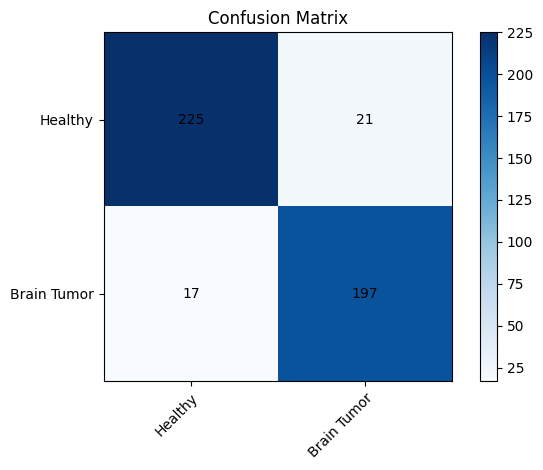

In [8]:
# Load the saved model
model = load_model('model.h5')

# Generate predictions for the test data
y_pred = model.predict(test_data)

# Convert predicted and true labels to integer format
y_pred_int = np.argmax(y_pred, axis=1)
y_true_int = np.argmax(test_labels, axis=1)

# Generate classification report
target_names = ['Healthy', 'Brain Tumor']
print(classification_report(y_true_int, y_pred_int, target_names=target_names))

# Generate confusion matrix
conf_mat = confusion_matrix(y_true_int, y_pred_int)
print(conf_mat)

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_mat, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set labels
ax.set_xticks(np.arange(len(target_names)))
ax.set_yticks(np.arange(len(target_names)))
ax.set_xticklabels(target_names)
ax.set_yticklabels(target_names)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(target_names)):
    for j in range(len(target_names)):
        text = ax.text(j, i, conf_mat[i, j],
                       ha="center", va="center", color="k")

ax.set_title("Confusion Matrix")
fig.tight_layout()
# Save the plot with high resolution
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

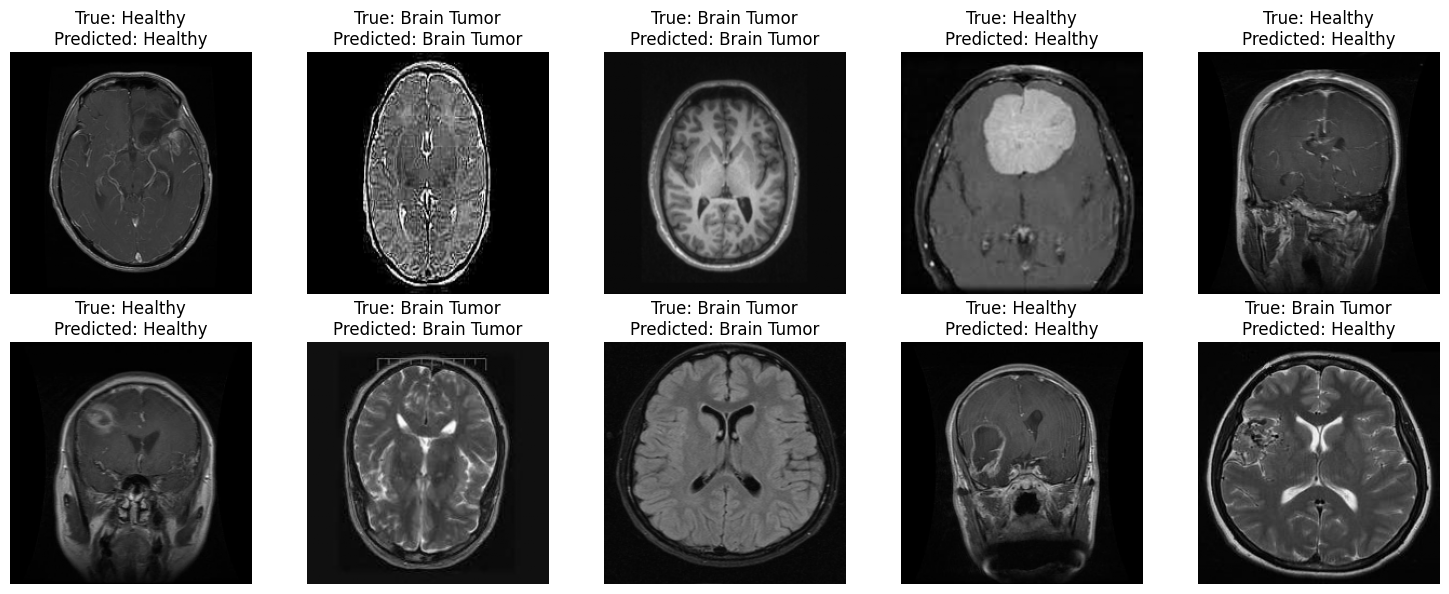

In [13]:
# Select 10 random images
random_indices = np.random.choice(len(test_data), size=10, replace=False)

# Display images and their predicted and true labels
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axs.flat):
    idx = random_indices[i]
    ax.imshow(test_data[idx])
    ax.set_title(f"True: {target_names[y_true_int[idx]]}\nPredicted: {target_names[y_pred_int[idx]]}")
    ax.axis('off')
fig.tight_layout()
plt.savefig('random_images.png', dpi=300)
plt.show()

In [20]:
import matplotlib
from tabulate import tabulate

table = [
    ["Python", sys.version[:6]],
    ["Pandas", pd.__version__],
    ["NumPy", np.__version__],
    ["Matplotlib", matplotlib.__version__],
    ["OpenCV", cv2.__version__],
    ["Keras", keras.__version__],
    ["TensorFlow", tf.__version__],
    ["Seaborn", sns.__version__]
]

print("Versions of frameworks used in this code:")
print(tabulate(table, headers=["Framework", "Version"], tablefmt="fancy_grid"))

Versions of frameworks used in this code:
╒═════════════╤═══════════╕
│ Framework   │ Version   │
╞═════════════╪═══════════╡
│ Python      │ 3.11.5    │
├─────────────┼───────────┤
│ Pandas      │ 2.1.0     │
├─────────────┼───────────┤
│ NumPy       │ 1.23.5    │
├─────────────┼───────────┤
│ Matplotlib  │ 3.8.0     │
├─────────────┼───────────┤
│ OpenCV      │ 4.8.0     │
├─────────────┼───────────┤
│ Keras       │ 2.14.0    │
├─────────────┼───────────┤
│ TensorFlow  │ 2.14.0    │
├─────────────┼───────────┤
│ Seaborn     │ 0.12.2    │
╘═════════════╧═══════════╛
